In [1]:
# 0608 수

In [31]:
import matplotlib.pyplot as plt
import matplotlib

import numpy as np

In [32]:
# 터미널이 아닌 쥬피터 상에서 쓸수 있게 해주는 명령어 '!'
!python --version

Python 3.7.6


In [33]:
import matplotlib.patches as mpatches

from sklearn.datasets import make_blobs, make_circles

In [34]:
def plot_data(pl, X, y):
    pl.plot(X[y == 0, 0], X[y == 0, 1], 'ob', alpha = 0.5)
    pl.plot(X[y == 1, 0], X[y == 1, 1], 'xr', alpha = 0.5)
    pl.legend(['0', '1'])
    return pl

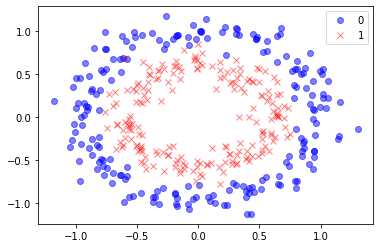

In [35]:
X, y = make_circles(
    n_samples = 400, 
    factor = 0.6,
    noise = 0.1,
    random_state = 42
)

pl = plot_data(plt, X, y)
pl.show()

In [36]:
seed = 1

print("X size =", X.shape)
print("y size =", y.shape)
print("Num of Samples =", X.shape[0])

X size = (400, 2)
y size = (400,)
Num of Samples = 400


In [37]:
print(X)

[[ 5.22047667e-01  2.45076964e-01]
 [-4.90174568e-01  4.04540597e-01]
 [ 4.69901235e-01  9.04544287e-01]
 [ 7.37010889e-01  1.11486553e-01]
 [-9.86636209e-01  1.69521513e-01]
 [-7.17008501e-01  4.38359514e-01]
 [-4.41013452e-01 -5.31920699e-01]
 [-9.95858989e-01  1.08030813e-01]
 [-3.25897203e-01  5.41504194e-01]
 [-6.96094447e-01 -6.45797770e-01]
 [ 9.28358178e-01  2.58529455e-01]
 [ 2.30348927e-01 -3.40047801e-01]
 [-2.66141506e-01  1.17464969e+00]
 [-7.55781307e-01  7.93410286e-01]
 [-5.69765424e-01 -9.25855019e-01]
 [ 3.18599125e-01  1.02857282e+00]
 [-5.10432759e-01  1.73074993e-01]
 [ 3.95376430e-01 -3.96807852e-01]
 [ 3.37431388e-01  5.71841873e-01]
 [ 7.27958177e-01 -2.31006816e-01]
 [-6.93334233e-01  6.76130038e-01]
 [ 1.00825010e+00  5.07130501e-01]
 [ 6.51086779e-01  1.35010193e-02]
 [-3.45045802e-01  4.46996781e-01]
 [ 1.04462893e+00  1.13624232e-01]
 [ 6.45411496e-01  3.08639177e-02]
 [-9.71724535e-01 -5.12587714e-01]
 [ 3.69760307e-01  2.97525839e-01]
 [-2.09844774e-01  5

In [38]:
from keras.layers import Dense, Activation
from keras.models import Sequential

np.random.seed(seed)

model = Sequential()

In [39]:
model.add(Dense(1, activation = 'sigmoid', input_dim = 2))
model.compile(optimizer = 'sgd', loss = 'binary_crossentropy')

In [40]:
model.fit(X, y, batch_size = 5, epochs=  100, verbose = 1)

Epoch 1/100
80/80 [==============================] - 0s 1ms/step - loss: 0.6955
Epoch 2/100
80/80 [==============================] - 0s 857us/step - loss: 0.6952
Epoch 3/100
80/80 [==============================] - 0s 868us/step - loss: 0.6950
Epoch 4/100
80/80 [==============================] - 0s 869us/step - loss: 0.6948
Epoch 5/100
80/80 [==============================] - 0s 897us/step - loss: 0.6946
Epoch 6/100
80/80 [==============================] - 0s 869us/step - loss: 0.6945
Epoch 7/100
80/80 [==============================] - 0s 882us/step - loss: 0.6943
Epoch 8/100
80/80 [==============================] - 0s 885us/step - loss: 0.6943
Epoch 9/100
80/80 [==============================] - 0s 842us/step - loss: 0.6942
Epoch 10/100
80/80 [==============================] - 0s 883us/step - loss: 0.6942
Epoch 11/100
80/80 [==============================] - 0s 864us/step - loss: 0.6940
Epoch 12/100
80/80 [==============================] - 0s 864us/step - loss: 0.6940
Epoch 13/100
80

80/80 [==============================] - 0s 871us/step - loss: 0.6935
Epoch 100/100
80/80 [==============================] - 0s 648us/step - loss: 0.6936


In [72]:
matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)

In [78]:
def plot_decision_bound(model, X, y):
    # X shape -> (400, 2)
    # a = x, b = y
    amin, bmin = X.min(axis = 0) - 0.45
    amax, bmax = X.max(axis = 0) + 0.45
    #print("amin =", amin)
    #print("bmin =", bmin)
    #print("amax =", amax)
    #print("bmax =", bmax)
    
    # np.linspace()는 
    # 첫번째 인자 - 두번째 인자 사이의 값을
    # 세번째 인자의 개수만큼 균일하게 쪼갠다.

    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    # meshgrid()는 x축 정보(벡터),  y축 정보(벡터)를 입력 받아
    # 사각형 영역에 대한 정보를 반환한다.
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    # model.predict(ab)를 사용하여 아래쪽에서 contourt를 사용할 준비를 한다.
    c = model.predict(ab)
    Z = c.reshape(aa.shape)
    
    #  alpha값은 투명도 낮을수록 높
    plt.contourf(aa, bb, Z, cmap = 'bwr', alpha = 0.2)
    plot_data(plt, X, y)
    return plt

amin = -1.6316529526885446
bmin = -1.5728358786713168
amax = 1.7551325543078138
bmax = 1.6246496919432165


Text(0.5, 1.0, 'Logistic Regression')

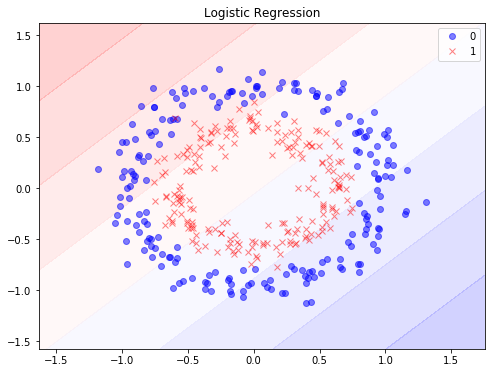

In [79]:
plot_decision_bound(model, X, y)
plt.title("Logistic Regression")

In [84]:
from keras.layers import Dense, Activation
from keras.models import Sequential

np.random.seed(seed)

model = Sequential()

model.add(Dense(3, activation = 'relu', input_dim = 2))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='sgd', loss = 'binary_crossentropy')

model.fit(X, y, batch_size = 5, epochs=  200, verbose = 1)


Epoch 1/200
80/80 [==============================] - 0s 549us/step - loss: 0.7949
Epoch 2/200
80/80 [==============================] - 0s 557us/step - loss: 0.7652
Epoch 3/200
80/80 [==============================] - 0s 939us/step - loss: 0.7471
Epoch 4/200
80/80 [==============================] - 0s 1ms/step - loss: 0.7348
Epoch 5/200
80/80 [==============================] - 0s 1ms/step - loss: 0.7258
Epoch 6/200
80/80 [==============================] - 0s 1ms/step - loss: 0.7188
Epoch 7/200
80/80 [==============================] - 0s 1ms/step - loss: 0.7131
Epoch 8/200
80/80 [==============================] - 0s 762us/step - loss: 0.7083
Epoch 9/200
80/80 [==============================] - 0s 490us/step - loss: 0.7043
Epoch 10/200
80/80 [==============================] - 0s 497us/step - loss: 0.7009
Epoch 11/200
80/80 [==============================] - 0s 551us/step - loss: 0.6981
Epoch 12/200
80/80 [==============================] - 0s 1ms/step - loss: 0.6954
Epoch 13/200
80/80 [===

80/80 [==============================] - 0s 512us/step - loss: 0.6463
Epoch 101/200
80/80 [==============================] - 0s 461us/step - loss: 0.6458
Epoch 102/200
80/80 [==============================] - 0s 447us/step - loss: 0.6457
Epoch 103/200
80/80 [==============================] - 0s 553us/step - loss: 0.6454
Epoch 104/200
80/80 [==============================] - 0s 903us/step - loss: 0.6451
Epoch 105/200
80/80 [==============================] - 0s 2ms/step - loss: 0.6449
Epoch 106/200
80/80 [==============================] - 0s 2ms/step - loss: 0.6447
Epoch 107/200
80/80 [==============================] - 0s 2ms/step - loss: 0.6445
Epoch 108/200
80/80 [==============================] - 0s 2ms/step - loss: 0.6443
Epoch 109/200
80/80 [==============================] - 0s 1ms/step - loss: 0.6440
Epoch 110/200
80/80 [==============================] - 0s 647us/step - loss: 0.6439
Epoch 111/200
80/80 [==============================] - 0s 1ms/step - loss: 0.6435
Epoch 112/200
80/8

80/80 [==============================] - 0s 611us/step - loss: 0.6278
Epoch 199/200
80/80 [==============================] - 0s 590us/step - loss: 0.6275
Epoch 200/200
80/80 [==============================] - 0s 623us/step - loss: 0.6275


amin = -1.6316529526885446
bmin = -1.5728358786713168
amax = 1.7551325543078138
bmax = 1.6246496919432165


Text(0.5, 1.0, 'hidden Layer 3(tanh)')

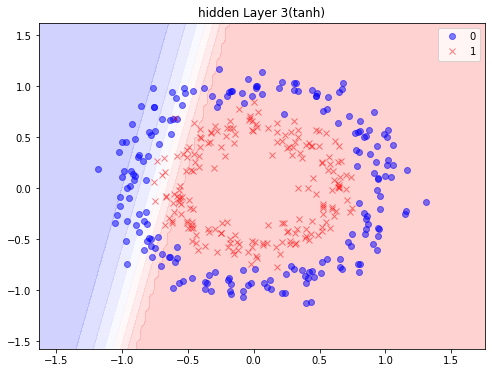

In [85]:
plot_decision_bound(model, X, y)
plt.title("hidden Layer 3(tanh)")

In [86]:
from keras.layers import Dense, Activation
from keras.models import Sequential

np.random.seed(seed)

model = Sequential()

model.add(Dense(6, activation = 'relu', input_dim = 2))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='sgd', loss = 'binary_crossentropy')

model.fit(X, y, batch_size = 5, epochs=  200, verbose = 1)


Epoch 1/200
80/80 [==============================] - 0s 532us/step - loss: 0.6798
Epoch 2/200
80/80 [==============================] - 0s 530us/step - loss: 0.6737
Epoch 3/200
80/80 [==============================] - 0s 574us/step - loss: 0.6690
Epoch 4/200
80/80 [==============================] - 0s 614us/step - loss: 0.6650
Epoch 5/200
80/80 [==============================] - 0s 623us/step - loss: 0.6618
Epoch 6/200
80/80 [==============================] - 0s 625us/step - loss: 0.6587
Epoch 7/200
80/80 [==============================] - 0s 598us/step - loss: 0.6558
Epoch 8/200
80/80 [==============================] - 0s 664us/step - loss: 0.6531
Epoch 9/200
80/80 [==============================] - 0s 622us/step - loss: 0.6505
Epoch 10/200
80/80 [==============================] - 0s 689us/step - loss: 0.6477
Epoch 11/200
80/80 [==============================] - 0s 715us/step - loss: 0.6451
Epoch 12/200
80/80 [==============================] - 0s 717us/step - loss: 0.6424
Epoch 13/200


80/80 [==============================] - 0s 605us/step - loss: 0.3172
Epoch 100/200
80/80 [==============================] - 0s 655us/step - loss: 0.3144
Epoch 101/200
80/80 [==============================] - 0s 661us/step - loss: 0.3114
Epoch 102/200
80/80 [==============================] - 0s 604us/step - loss: 0.3082
Epoch 103/200
80/80 [==============================] - 0s 595us/step - loss: 0.3049
Epoch 104/200
80/80 [==============================] - 0s 604us/step - loss: 0.3017
Epoch 105/200
80/80 [==============================] - 0s 716us/step - loss: 0.2988
Epoch 106/200
80/80 [==============================] - 0s 797us/step - loss: 0.2953
Epoch 107/200
80/80 [==============================] - 0s 787us/step - loss: 0.2926
Epoch 108/200
80/80 [==============================] - 0s 815us/step - loss: 0.2894
Epoch 109/200
80/80 [==============================] - 0s 776us/step - loss: 0.2867
Epoch 110/200
80/80 [==============================] - 0s 753us/step - loss: 0.2837
Epoch 

80/80 [==============================] - 0s 851us/step - loss: 0.1452
Epoch 197/200
80/80 [==============================] - 0s 841us/step - loss: 0.1445
Epoch 198/200
80/80 [==============================] - 0s 861us/step - loss: 0.1438
Epoch 199/200
80/80 [==============================] - 0s 837us/step - loss: 0.1430
Epoch 200/200
80/80 [==============================] - 0s 858us/step - loss: 0.1426


amin = -1.6316529526885446
bmin = -1.5728358786713168
amax = 1.7551325543078138
bmax = 1.6246496919432165


Text(0.5, 1.0, 'hidden Layer 3(tanh)')

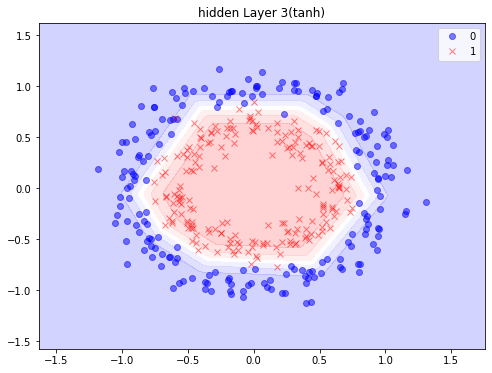

In [87]:
plot_decision_bound(model, X, y)
plt.title("hidden Layer 3(tanh)")

In [88]:
from keras.layers import Dense, Activation
from keras.models import Sequential

np.random.seed(seed)

model = Sequential()

model.add(Dense(6, activation = 'relu', input_dim = 2))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='sgd', loss = 'binary_crossentropy')

model.fit(X, y, batch_size = 5, epochs=  500, verbose = 1)


Epoch 1/500
80/80 [==============================] - 0s 559us/step - loss: 0.6925
Epoch 2/500
80/80 [==============================] - 0s 528us/step - loss: 0.6894
Epoch 3/500
80/80 [==============================] - 0s 558us/step - loss: 0.6865
Epoch 4/500
80/80 [==============================] - 0s 573us/step - loss: 0.6838
Epoch 5/500
80/80 [==============================] - 0s 567us/step - loss: 0.6809
Epoch 6/500
80/80 [==============================] - 0s 601us/step - loss: 0.6783
Epoch 7/500
80/80 [==============================] - 0s 616us/step - loss: 0.6759
Epoch 8/500
80/80 [==============================] - 0s 597us/step - loss: 0.6733
Epoch 9/500
80/80 [==============================] - 0s 562us/step - loss: 0.6706
Epoch 10/500
80/80 [==============================] - 0s 582us/step - loss: 0.6681
Epoch 11/500
80/80 [==============================] - 0s 662us/step - loss: 0.6645
Epoch 12/500
80/80 [==============================] - 0s 642us/step - loss: 0.6598
Epoch 13/500


80/80 [==============================] - 0s 708us/step - loss: 0.3264
Epoch 100/500
80/80 [==============================] - 0s 724us/step - loss: 0.3225
Epoch 101/500
80/80 [==============================] - 0s 755us/step - loss: 0.3186
Epoch 102/500
80/80 [==============================] - 0s 729us/step - loss: 0.3148
Epoch 103/500
80/80 [==============================] - 0s 683us/step - loss: 0.3115
Epoch 104/500
80/80 [==============================] - 0s 739us/step - loss: 0.3080
Epoch 105/500
80/80 [==============================] - 0s 703us/step - loss: 0.3041
Epoch 106/500
80/80 [==============================] - 0s 717us/step - loss: 0.3007
Epoch 107/500
80/80 [==============================] - 0s 621us/step - loss: 0.2973
Epoch 108/500
80/80 [==============================] - 0s 600us/step - loss: 0.2939
Epoch 109/500
80/80 [==============================] - 0s 647us/step - loss: 0.2909
Epoch 110/500
80/80 [==============================] - 0s 627us/step - loss: 0.2873
Epoch 

80/80 [==============================] - 0s 644us/step - loss: 0.1406
Epoch 197/500
80/80 [==============================] - 0s 656us/step - loss: 0.1405
Epoch 198/500
80/80 [==============================] - 0s 645us/step - loss: 0.1400
Epoch 199/500
80/80 [==============================] - 0s 659us/step - loss: 0.1388
Epoch 200/500
80/80 [==============================] - 0s 637us/step - loss: 0.1381
Epoch 201/500
80/80 [==============================] - 0s 659us/step - loss: 0.1373
Epoch 202/500
80/80 [==============================] - 0s 684us/step - loss: 0.1370
Epoch 203/500
80/80 [==============================] - 0s 702us/step - loss: 0.1363
Epoch 204/500
80/80 [==============================] - 0s 761us/step - loss: 0.1356
Epoch 205/500
80/80 [==============================] - 0s 741us/step - loss: 0.1347
Epoch 206/500
80/80 [==============================] - 0s 735us/step - loss: 0.1340
Epoch 207/500
80/80 [==============================] - 0s 736us/step - loss: 0.1333
Epoch 

80/80 [==============================] - 0s 733us/step - loss: 0.0948
Epoch 294/500
80/80 [==============================] - 0s 752us/step - loss: 0.0945
Epoch 295/500
80/80 [==============================] - 0s 763us/step - loss: 0.0944
Epoch 296/500
80/80 [==============================] - 0s 776us/step - loss: 0.0943
Epoch 297/500
80/80 [==============================] - 0s 784us/step - loss: 0.0939
Epoch 298/500
80/80 [==============================] - 0s 778us/step - loss: 0.0939
Epoch 299/500
80/80 [==============================] - 0s 767us/step - loss: 0.0936
Epoch 300/500
80/80 [==============================] - 0s 836us/step - loss: 0.0932
Epoch 301/500
80/80 [==============================] - 0s 747us/step - loss: 0.0927
Epoch 302/500
80/80 [==============================] - 0s 853us/step - loss: 0.0925
Epoch 303/500
80/80 [==============================] - 0s 730us/step - loss: 0.0924
Epoch 304/500
80/80 [==============================] - 0s 823us/step - loss: 0.0921
Epoch 

80/80 [==============================] - 0s 753us/step - loss: 0.0770
Epoch 391/500
80/80 [==============================] - 0s 797us/step - loss: 0.0765
Epoch 392/500
80/80 [==============================] - 0s 753us/step - loss: 0.0761
Epoch 393/500
80/80 [==============================] - 0s 749us/step - loss: 0.0759
Epoch 394/500
80/80 [==============================] - 0s 820us/step - loss: 0.0761
Epoch 395/500
80/80 [==============================] - 0s 809us/step - loss: 0.0758
Epoch 396/500
80/80 [==============================] - 0s 780us/step - loss: 0.0760
Epoch 397/500
80/80 [==============================] - 0s 798us/step - loss: 0.0758
Epoch 398/500
80/80 [==============================] - 0s 788us/step - loss: 0.0754
Epoch 399/500
80/80 [==============================] - 0s 781us/step - loss: 0.0757
Epoch 400/500
80/80 [==============================] - 0s 797us/step - loss: 0.0754
Epoch 401/500
80/80 [==============================] - 0s 746us/step - loss: 0.0753
Epoch 

80/80 [==============================] - 0s 747us/step - loss: 0.0670
Epoch 488/500
80/80 [==============================] - 0s 835us/step - loss: 0.0668
Epoch 489/500
80/80 [==============================] - 0s 751us/step - loss: 0.0670
Epoch 490/500
80/80 [==============================] - 0s 757us/step - loss: 0.0669
Epoch 491/500
80/80 [==============================] - 0s 763us/step - loss: 0.0669
Epoch 492/500
80/80 [==============================] - 0s 754us/step - loss: 0.0665
Epoch 493/500
80/80 [==============================] - 0s 764us/step - loss: 0.0671
Epoch 494/500
80/80 [==============================] - 0s 748us/step - loss: 0.0666
Epoch 495/500
80/80 [==============================] - 0s 791us/step - loss: 0.0666
Epoch 496/500
80/80 [==============================] - 0s 777us/step - loss: 0.0666
Epoch 497/500
80/80 [==============================] - 0s 756us/step - loss: 0.0663
Epoch 498/500
80/80 [==============================] - 0s 781us/step - loss: 0.0664
Epoch 

amin = -1.6316529526885446
bmin = -1.5728358786713168
amax = 1.7551325543078138
bmax = 1.6246496919432165


Text(0.5, 1.0, 'hidden Layer 6(tanh)')

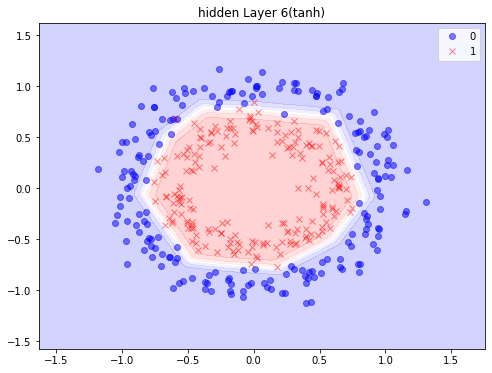

In [90]:
plot_decision_bound(model, X, y)
plt.title("hidden Layer 6(tanh)")

In [97]:
X, y = make_circles(
    # 샘플 개수가 적더라도 정확한 데이터를 수집하는게 중요하다.
    # 잘못된 정보를 수집하면 제대로된 a.i가 될 수 없다.
    n_samples = 500, 
    factor = 0.6,
    noise = 0.1,
    random_state = 42
)
# 샘플의 개수가 적으니 인공 신경망 특성상
# 성능의 저하가 발생하는것을 발견 할수 있었다.

In [92]:
from keras.layers import Dense, Activation
from keras.models import Sequential

np.random.seed(seed)

model = Sequential()

model.add(Dense(6, activation = 'relu', input_dim = 2))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='sgd', loss = 'binary_crossentropy')

model.fit(X, y, batch_size = 5, epochs=  500, verbose = 1)


Epoch 1/500
20/20 [==============================] - 0s 663us/step - loss: 0.6993
Epoch 2/500
20/20 [==============================] - 0s 619us/step - loss: 0.6982
Epoch 3/500
20/20 [==============================] - 0s 464us/step - loss: 0.6973
Epoch 4/500
20/20 [==============================] - 0s 540us/step - loss: 0.6962
Epoch 5/500
20/20 [==============================] - 0s 516us/step - loss: 0.6956
Epoch 6/500
20/20 [==============================] - 0s 435us/step - loss: 0.6945
Epoch 7/500
20/20 [==============================] - 0s 482us/step - loss: 0.6935
Epoch 8/500
20/20 [==============================] - 0s 482us/step - loss: 0.6926
Epoch 9/500
20/20 [==============================] - 0s 529us/step - loss: 0.6919
Epoch 10/500
20/20 [==============================] - 0s 562us/step - loss: 0.6912
Epoch 11/500
20/20 [==============================] - 0s 603us/step - loss: 0.6902
Epoch 12/500
20/20 [==============================] - 0s 511us/step - loss: 0.6895
Epoch 13/500


20/20 [==============================] - 0s 462us/step - loss: 0.6424
Epoch 100/500
20/20 [==============================] - 0s 480us/step - loss: 0.6420
Epoch 101/500
20/20 [==============================] - 0s 492us/step - loss: 0.6415
Epoch 102/500
20/20 [==============================] - 0s 448us/step - loss: 0.6410
Epoch 103/500
20/20 [==============================] - 0s 457us/step - loss: 0.6403
Epoch 104/500
20/20 [==============================] - 0s 501us/step - loss: 0.6398
Epoch 105/500
20/20 [==============================] - 0s 506us/step - loss: 0.6394
Epoch 106/500
20/20 [==============================] - 0s 470us/step - loss: 0.6388
Epoch 107/500
20/20 [==============================] - 0s 500us/step - loss: 0.6384
Epoch 108/500
20/20 [==============================] - 0s 508us/step - loss: 0.6376
Epoch 109/500
20/20 [==============================] - 0s 481us/step - loss: 0.6374
Epoch 110/500
20/20 [==============================] - 0s 457us/step - loss: 0.6366
Epoch 

20/20 [==============================] - 0s 502us/step - loss: 0.5805
Epoch 197/500
20/20 [==============================] - 0s 523us/step - loss: 0.5796
Epoch 198/500
20/20 [==============================] - 0s 496us/step - loss: 0.5787
Epoch 199/500
20/20 [==============================] - 0s 517us/step - loss: 0.5780
Epoch 200/500
20/20 [==============================] - 0s 543us/step - loss: 0.5772
Epoch 201/500
20/20 [==============================] - 0s 545us/step - loss: 0.5763
Epoch 202/500
20/20 [==============================] - 0s 570us/step - loss: 0.5757
Epoch 203/500
20/20 [==============================] - 0s 477us/step - loss: 0.5752
Epoch 204/500
20/20 [==============================] - 0s 568us/step - loss: 0.5741
Epoch 205/500
20/20 [==============================] - 0s 542us/step - loss: 0.5732
Epoch 206/500
20/20 [==============================] - 0s 567us/step - loss: 0.5727
Epoch 207/500
20/20 [==============================] - 0s 506us/step - loss: 0.5716
Epoch 

20/20 [==============================] - 0s 477us/step - loss: 0.4958
Epoch 294/500
20/20 [==============================] - 0s 478us/step - loss: 0.4948
Epoch 295/500
20/20 [==============================] - 0s 475us/step - loss: 0.4941
Epoch 296/500
20/20 [==============================] - 0s 456us/step - loss: 0.4930
Epoch 297/500
20/20 [==============================] - 0s 490us/step - loss: 0.4924
Epoch 298/500
20/20 [==============================] - 0s 450us/step - loss: 0.4912
Epoch 299/500
20/20 [==============================] - 0s 501us/step - loss: 0.4910
Epoch 300/500
20/20 [==============================] - 0s 464us/step - loss: 0.4896
Epoch 301/500
20/20 [==============================] - 0s 474us/step - loss: 0.4891
Epoch 302/500
20/20 [==============================] - 0s 571us/step - loss: 0.4880
Epoch 303/500
20/20 [==============================] - 0s 457us/step - loss: 0.4868
Epoch 304/500
20/20 [==============================] - 0s 497us/step - loss: 0.4863
Epoch 

20/20 [==============================] - 0s 502us/step - loss: 0.4151
Epoch 391/500
20/20 [==============================] - 0s 506us/step - loss: 0.4143
Epoch 392/500
20/20 [==============================] - 0s 448us/step - loss: 0.4136
Epoch 393/500
20/20 [==============================] - 0s 469us/step - loss: 0.4128
Epoch 394/500
20/20 [==============================] - 0s 468us/step - loss: 0.4120
Epoch 395/500
20/20 [==============================] - 0s 593us/step - loss: 0.4116
Epoch 396/500
20/20 [==============================] - 0s 522us/step - loss: 0.4107
Epoch 397/500
20/20 [==============================] - 0s 469us/step - loss: 0.4101
Epoch 398/500
20/20 [==============================] - 0s 522us/step - loss: 0.4093
Epoch 399/500
20/20 [==============================] - 0s 473us/step - loss: 0.4085
Epoch 400/500
20/20 [==============================] - 0s 482us/step - loss: 0.4077
Epoch 401/500
20/20 [==============================] - 0s 494us/step - loss: 0.4075
Epoch 

20/20 [==============================] - 0s 526us/step - loss: 0.3560
Epoch 488/500
20/20 [==============================] - 0s 478us/step - loss: 0.3557
Epoch 489/500
20/20 [==============================] - 0s 461us/step - loss: 0.3555
Epoch 490/500
20/20 [==============================] - 0s 483us/step - loss: 0.3550
Epoch 491/500
20/20 [==============================] - 0s 471us/step - loss: 0.3547
Epoch 492/500
20/20 [==============================] - 0s 474us/step - loss: 0.3538
Epoch 493/500
20/20 [==============================] - 0s 545us/step - loss: 0.3536
Epoch 494/500
20/20 [==============================] - 0s 481us/step - loss: 0.3530
Epoch 495/500
20/20 [==============================] - 0s 507us/step - loss: 0.3522
Epoch 496/500
20/20 [==============================] - 0s 442us/step - loss: 0.3517
Epoch 497/500
20/20 [==============================] - 0s 494us/step - loss: 0.3517
Epoch 498/500
20/20 [==============================] - 0s 466us/step - loss: 0.3508
Epoch 

amin = -1.613167659166981
bmin = -1.6172085540533019
amax = 1.6075379267412893
bmax = 1.532785938798952


Text(0.5, 1.0, 'hidden Layer 6(tanh)')

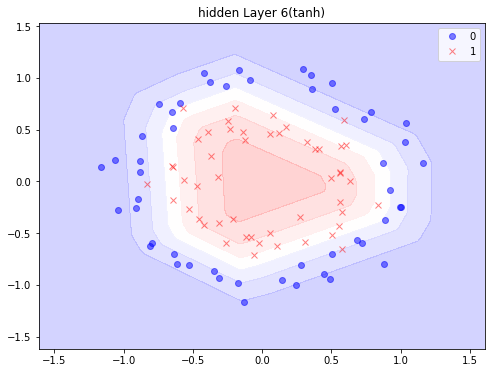

In [93]:
plot_decision_bound(model, X, y)
plt.title("hidden Layer 6(tanh)")

In [98]:
from keras.layers import Dense, Activation
from keras.models import Sequential

np.random.seed(seed)

model = Sequential()

model.add(Dense(12, activation = 'relu', input_dim = 2))
model.add(Dense(6, activation = 'tanh'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='sgd', loss = 'binary_crossentropy')

model.fit(X, y, batch_size = 5, epochs=  500, verbose = 1)

Epoch 1/500
100/100 [==============================] - 0s 500us/step - loss: 0.6608
Epoch 2/500
100/100 [==============================] - 0s 522us/step - loss: 0.6489
Epoch 3/500
100/100 [==============================] - 0s 534us/step - loss: 0.6411
Epoch 4/500
100/100 [==============================] - 0s 511us/step - loss: 0.6340
Epoch 5/500
100/100 [==============================] - 0s 668us/step - loss: 0.6274
Epoch 6/500
100/100 [==============================] - 0s 528us/step - loss: 0.6199
Epoch 7/500
100/100 [==============================] - 0s 566us/step - loss: 0.6112
Epoch 8/500
100/100 [==============================] - 0s 522us/step - loss: 0.6028
Epoch 9/500
100/100 [==============================] - 0s 500us/step - loss: 0.5931
Epoch 10/500
100/100 [==============================] - 0s 490us/step - loss: 0.5825
Epoch 11/500
100/100 [==============================] - 0s 499us/step - loss: 0.5713
Epoch 12/500
100/100 [==============================] - 0s 484us/step - lo

100/100 [==============================] - 0s 691us/step - loss: 0.0879
Epoch 98/500
100/100 [==============================] - 0s 699us/step - loss: 0.0867
Epoch 99/500
100/100 [==============================] - 0s 675us/step - loss: 0.0860
Epoch 100/500
100/100 [==============================] - 0s 685us/step - loss: 0.0864
Epoch 101/500
100/100 [==============================] - 0s 718us/step - loss: 0.0838
Epoch 102/500
100/100 [==============================] - 0s 769us/step - loss: 0.0859
Epoch 103/500
100/100 [==============================] - 0s 823us/step - loss: 0.0854
Epoch 104/500
100/100 [==============================] - 0s 825us/step - loss: 0.0844
Epoch 105/500
100/100 [==============================] - 0s 757us/step - loss: 0.0852
Epoch 106/500
100/100 [==============================] - 0s 761us/step - loss: 0.0835
Epoch 107/500
100/100 [==============================] - 0s 853us/step - loss: 0.0838
Epoch 108/500
100/100 [==============================] - 0s 524us/step

100/100 [==============================] - 0s 750us/step - loss: 0.0772
Epoch 193/500
100/100 [==============================] - 0s 779us/step - loss: 0.0770
Epoch 194/500
100/100 [==============================] - 0s 759us/step - loss: 0.0733
Epoch 195/500
100/100 [==============================] - 0s 744us/step - loss: 0.0772
Epoch 196/500
100/100 [==============================] - 0s 754us/step - loss: 0.0753
Epoch 197/500
100/100 [==============================] - 0s 766us/step - loss: 0.0784
Epoch 198/500
100/100 [==============================] - 0s 766us/step - loss: 0.0729
Epoch 199/500
100/100 [==============================] - 0s 755us/step - loss: 0.0767
Epoch 200/500
100/100 [==============================] - 0s 801us/step - loss: 0.0741
Epoch 201/500
100/100 [==============================] - 0s 749us/step - loss: 0.0711
Epoch 202/500
100/100 [==============================] - 0s 743us/step - loss: 0.0760
Epoch 203/500
100/100 [==============================] - 0s 789us/st

100/100 [==============================] - 0s 695us/step - loss: 0.0750
Epoch 288/500
100/100 [==============================] - 0s 690us/step - loss: 0.0762
Epoch 289/500
100/100 [==============================] - 0s 705us/step - loss: 0.0747
Epoch 290/500
100/100 [==============================] - 0s 670us/step - loss: 0.0752
Epoch 291/500
100/100 [==============================] - 0s 719us/step - loss: 0.0732
Epoch 292/500
100/100 [==============================] - 0s 714us/step - loss: 0.0734
Epoch 293/500
100/100 [==============================] - 0s 686us/step - loss: 0.0733
Epoch 294/500
100/100 [==============================] - 0s 696us/step - loss: 0.0774
Epoch 295/500
100/100 [==============================] - 0s 700us/step - loss: 0.0761
Epoch 296/500
100/100 [==============================] - 0s 684us/step - loss: 0.0741
Epoch 297/500
100/100 [==============================] - 0s 713us/step - loss: 0.0742
Epoch 298/500
100/100 [==============================] - 0s 750us/st

100/100 [==============================] - 0s 742us/step - loss: 0.0700
Epoch 383/500
100/100 [==============================] - 0s 769us/step - loss: 0.0712
Epoch 384/500
100/100 [==============================] - 0s 704us/step - loss: 0.0747
Epoch 385/500
100/100 [==============================] - 0s 708us/step - loss: 0.0730
Epoch 386/500
100/100 [==============================] - 0s 692us/step - loss: 0.0733
Epoch 387/500
100/100 [==============================] - 0s 730us/step - loss: 0.0727
Epoch 388/500
100/100 [==============================] - 0s 712us/step - loss: 0.0730
Epoch 389/500
100/100 [==============================] - 0s 691us/step - loss: 0.0721
Epoch 390/500
100/100 [==============================] - 0s 697us/step - loss: 0.0718
Epoch 391/500
100/100 [==============================] - 0s 725us/step - loss: 0.0734
Epoch 392/500
100/100 [==============================] - 0s 708us/step - loss: 0.0728
Epoch 393/500
100/100 [==============================] - 0s 821us/st

100/100 [==============================] - 0s 794us/step - loss: 0.0732
Epoch 478/500
100/100 [==============================] - 0s 802us/step - loss: 0.0741
Epoch 479/500
100/100 [==============================] - 0s 789us/step - loss: 0.0721
Epoch 480/500
100/100 [==============================] - 0s 803us/step - loss: 0.0712
Epoch 481/500
100/100 [==============================] - 0s 865us/step - loss: 0.0730
Epoch 482/500
100/100 [==============================] - 0s 892us/step - loss: 0.0702
Epoch 483/500
100/100 [==============================] - 0s 876us/step - loss: 0.0710
Epoch 484/500
100/100 [==============================] - 0s 880us/step - loss: 0.0714
Epoch 485/500
100/100 [==============================] - 0s 862us/step - loss: 0.0717
Epoch 486/500
100/100 [==============================] - 0s 871us/step - loss: 0.0703
Epoch 487/500
100/100 [==============================] - 0s 867us/step - loss: 0.0697
Epoch 488/500
100/100 [==============================] - 0s 883us/st

amin = -1.6424075875616821
bmin = -1.6356045922846658
amax = 1.6080845498396694
bmax = 1.7586943742026844


Text(0.5, 1.0, 'hidden Layer 12(tanh)')

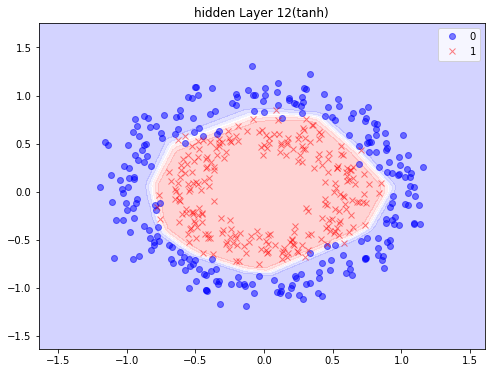

In [101]:
plot_decision_bound(model, X, y)
plt.title("hidden Layer 12(tanh)")

In [102]:
from keras.layers import Dense, Activation
from keras.models import Sequential

np.random.seed(seed)

model = Sequential()

model.add(Dense(256, activation = 'relu', input_dim = 2))
model.add(Dense(128, activation = 'tanh'))
model.add(Dense(96, activation = 'tanh'))
model.add(Dense(64, activation = 'tanh'))
model.add(Dense(32, activation = 'tanh'))
model.add(Dense(16, activation = 'tanh'))
model.add(Dense(8, activation = 'tanh'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='sgd', loss = 'binary_crossentropy')

model.fit(X, y, batch_size = 5, epochs=  500, verbose = 1)

Epoch 1/500
100/100 [==============================] - 0s 780us/step - loss: 0.6625
Epoch 2/500
100/100 [==============================] - 0s 670us/step - loss: 0.5640
Epoch 3/500
100/100 [==============================] - 0s 660us/step - loss: 0.3847
Epoch 4/500
100/100 [==============================] - 0s 674us/step - loss: 0.2504
Epoch 5/500
100/100 [==============================] - 0s 691us/step - loss: 0.1864
Epoch 6/500
100/100 [==============================] - 0s 685us/step - loss: 0.1569
Epoch 7/500
100/100 [==============================] - 0s 735us/step - loss: 0.1630
Epoch 8/500
100/100 [==============================] - 0s 718us/step - loss: 0.1738
Epoch 9/500
100/100 [==============================] - 0s 669us/step - loss: 0.1587
Epoch 10/500
100/100 [==============================] - 0s 696us/step - loss: 0.1436
Epoch 11/500
100/100 [==============================] - 0s 686us/step - loss: 0.1519
Epoch 12/500
100/100 [==============================] - 0s 664us/step - lo

100/100 [==============================] - 0s 694us/step - loss: 0.0816
Epoch 98/500
100/100 [==============================] - 0s 680us/step - loss: 0.0785
Epoch 99/500
100/100 [==============================] - 0s 677us/step - loss: 0.0817
Epoch 100/500
100/100 [==============================] - 0s 744us/step - loss: 0.0860
Epoch 101/500
100/100 [==============================] - 0s 706us/step - loss: 0.0764
Epoch 102/500
100/100 [==============================] - 0s 692us/step - loss: 0.0901
Epoch 103/500
100/100 [==============================] - 0s 698us/step - loss: 0.0793
Epoch 104/500
100/100 [==============================] - 0s 711us/step - loss: 0.0816
Epoch 105/500
100/100 [==============================] - 0s 694us/step - loss: 0.0787
Epoch 106/500
100/100 [==============================] - 0s 693us/step - loss: 0.0752
Epoch 107/500
100/100 [==============================] - 0s 705us/step - loss: 0.0816
Epoch 108/500
100/100 [==============================] - 0s 691us/step

100/100 [==============================] - 0s 691us/step - loss: 0.0756
Epoch 193/500
100/100 [==============================] - 0s 682us/step - loss: 0.0656
Epoch 194/500
100/100 [==============================] - 0s 744us/step - loss: 0.0749
Epoch 195/500
100/100 [==============================] - 0s 701us/step - loss: 0.0719
Epoch 196/500
100/100 [==============================] - 0s 709us/step - loss: 0.0764
Epoch 197/500
100/100 [==============================] - 0s 693us/step - loss: 0.0676
Epoch 198/500
100/100 [==============================] - 0s 672us/step - loss: 0.0684
Epoch 199/500
100/100 [==============================] - 0s 727us/step - loss: 0.0747
Epoch 200/500
100/100 [==============================] - 0s 746us/step - loss: 0.0815
Epoch 201/500
100/100 [==============================] - 0s 711us/step - loss: 0.0737
Epoch 202/500
100/100 [==============================] - 0s 701us/step - loss: 0.0731
Epoch 203/500
100/100 [==============================] - 0s 698us/st

100/100 [==============================] - 0s 677us/step - loss: 0.0640
Epoch 288/500
100/100 [==============================] - 0s 716us/step - loss: 0.0729
Epoch 289/500
100/100 [==============================] - 0s 690us/step - loss: 0.0712
Epoch 290/500
100/100 [==============================] - 0s 679us/step - loss: 0.0858
Epoch 291/500
100/100 [==============================] - 0s 706us/step - loss: 0.0686
Epoch 292/500
100/100 [==============================] - 0s 688us/step - loss: 0.0713
Epoch 293/500
100/100 [==============================] - 0s 695us/step - loss: 0.0683
Epoch 294/500
100/100 [==============================] - 0s 716us/step - loss: 0.0692
Epoch 295/500
100/100 [==============================] - 0s 707us/step - loss: 0.0676
Epoch 296/500
100/100 [==============================] - 0s 712us/step - loss: 0.0700
Epoch 297/500
100/100 [==============================] - 0s 710us/step - loss: 0.0651
Epoch 298/500
100/100 [==============================] - 0s 686us/st

100/100 [==============================] - 0s 739us/step - loss: 0.0671
Epoch 383/500
100/100 [==============================] - 0s 718us/step - loss: 0.0766
Epoch 384/500
100/100 [==============================] - 0s 715us/step - loss: 0.0640
Epoch 385/500
100/100 [==============================] - 0s 704us/step - loss: 0.0583
Epoch 386/500
100/100 [==============================] - 0s 725us/step - loss: 0.0749
Epoch 387/500
100/100 [==============================] - 0s 687us/step - loss: 0.0575
Epoch 388/500
100/100 [==============================] - 0s 711us/step - loss: 0.0912
Epoch 389/500
100/100 [==============================] - 0s 713us/step - loss: 0.0623
Epoch 390/500
100/100 [==============================] - 0s 708us/step - loss: 0.0686
Epoch 391/500
100/100 [==============================] - 0s 710us/step - loss: 0.0643
Epoch 392/500
100/100 [==============================] - 0s 729us/step - loss: 0.0626
Epoch 393/500
100/100 [==============================] - 0s 683us/st

100/100 [==============================] - 0s 732us/step - loss: 0.0755
Epoch 478/500
100/100 [==============================] - 0s 703us/step - loss: 0.0672
Epoch 479/500
100/100 [==============================] - 0s 726us/step - loss: 0.0538
Epoch 480/500
100/100 [==============================] - 0s 696us/step - loss: 0.0807
Epoch 481/500
100/100 [==============================] - 0s 712us/step - loss: 0.0646
Epoch 482/500
100/100 [==============================] - 0s 726us/step - loss: 0.0735
Epoch 483/500
100/100 [==============================] - 0s 722us/step - loss: 0.0535
Epoch 484/500
100/100 [==============================] - 0s 704us/step - loss: 0.0723
Epoch 485/500
100/100 [==============================] - 0s 715us/step - loss: 0.0767
Epoch 486/500
100/100 [==============================] - 0s 732us/step - loss: 0.0669
Epoch 487/500
100/100 [==============================] - 0s 732us/step - loss: 0.0583
Epoch 488/500
100/100 [==============================] - 0s 687us/st

amin = -1.6424075875616821
bmin = -1.6356045922846658
amax = 1.6080845498396694
bmax = 1.7586943742026844


Text(0.5, 1.0, 'hidden Layer 12(tanh)')

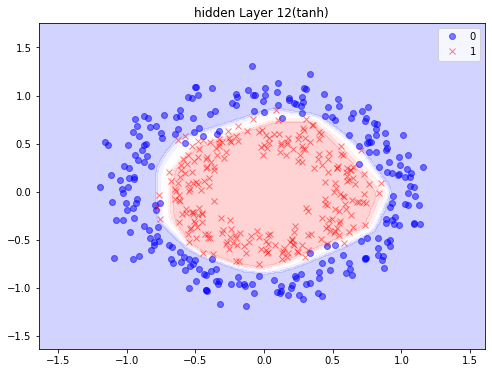

In [103]:
plot_decision_bound(model, X, y)
plt.title("hidden Layer 12(tanh)")

In [1]:
!ls

Applied-Deep-Learning-with-Keras  eleventh.ipynb  README.md
data				  LICENSE	  seventh.ipynb
eighth.ipynb			  nineth.ipynb	  tenth.ipynb


In [2]:
!ls Applied-Deep-Learning-with-Keras/Lesson02

Activity02.ipynb     bank_data_target.csv  Exercise07.ipynb  Exercise09.ipynb
bank_data_feats.csv  Exercise06.ipynb	   Exercise08.ipynb


In [1]:
import pandas as pd

data = pd.read_csv(
    "Applied-Deep-Learning-with-Keras/Lesson02/bank_data_feats.csv",
    index_col = 0
)
y = pd.read_csv(
    "Applied-Deep-Learning-with-Keras/Lesson02/bank_data_target.csv",
    index_col = 0
)

X = data

In [2]:
print("Num of Dataset = ", data.shape[0])
print("Num of Features = ", data.shape[1])

print(y.shape)

Num of Dataset =  4521
Num of Features =  32
(4521, 1)


In [21]:
from keras.models import Sequential
from keras.layers import Dense

def build_model():
    model = Sequential()
    model.add(Dense(16, input_dim = X.shape[1], activation= 'relu'))
    model.add(Dense(8, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))
    
    model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
    
    )
    
    return model
                   

In [22]:
import numpy as np

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [23]:
seed = 1

np.random.seed(seed)

In [ ]:
n_folds = 5
epochs = 300
batch_size = 5

# 분류 작업을 할 때 분류기 생성자
classifier = KerasClassifier(
    # 실질적으로 분류를 수행하는데 사용할 모델을 만드는 함수
    build_fn = build_model, 
    # 몇 회 반복을 할 것인가
    epochs =epochs,
    batch_size =batch_size,
    verbose = 1
)

In [27]:
# 우리가 가지고 있는 Train, Test 데이터에 대한 검증 생성자
# Train, Test 종합 1000개 있다고 가정

kfold = StratifiedKFold(
    n_splits = n_folds,
    shuffle = True,
    random_state = seed
)

In [26]:
results = cross_val_score(classifier, X, y, cv = kfold)

Epoch 1/300
724/724 [==============================] - 1s 904us/step - loss: 1.8208 - accuracy: 0.8299
Epoch 2/300
724/724 [==============================] - 1s 935us/step - loss: 0.5813 - accuracy: 0.8711
Epoch 3/300
724/724 [==============================] - 1s 954us/step - loss: 0.5304 - accuracy: 0.8725
Epoch 4/300
724/724 [==============================] - 1s 714us/step - loss: 0.4519 - accuracy: 0.8772
Epoch 5/300
724/724 [==============================] - 0s 562us/step - loss: 0.4456 - accuracy: 0.8786
Epoch 6/300
724/724 [==============================] - 0s 579us/step - loss: 0.4240 - accuracy: 0.8797
Epoch 7/300
724/724 [==============================] - 0s 575us/step - loss: 0.3965 - accuracy: 0.8789
Epoch 8/300
724/724 [==============================] - 0s 585us/step - loss: 0.3772 - accuracy: 0.8803
Epoch 9/300
724/724 [==============================] - 0s 612us/step - loss: 0.3575 - accuracy: 0.8841
Epoch 10/300
724/724 [==============================] - 0s 591us/step - l

724/724 [==============================] - 0s 661us/step - loss: 0.2593 - accuracy: 0.8941
Epoch 80/300
724/724 [==============================] - 0s 680us/step - loss: 0.2570 - accuracy: 0.8919
Epoch 81/300
724/724 [==============================] - 0s 647us/step - loss: 0.2570 - accuracy: 0.8919
Epoch 82/300
724/724 [==============================] - 0s 662us/step - loss: 0.2554 - accuracy: 0.8888
Epoch 83/300
724/724 [==============================] - 0s 644us/step - loss: 0.2591 - accuracy: 0.8941
Epoch 84/300
724/724 [==============================] - 0s 653us/step - loss: 0.2583 - accuracy: 0.8944
Epoch 85/300
724/724 [==============================] - 0s 647us/step - loss: 0.2669 - accuracy: 0.8941
Epoch 86/300
724/724 [==============================] - 0s 620us/step - loss: 0.2545 - accuracy: 0.8927
Epoch 87/300
724/724 [==============================] - 0s 570us/step - loss: 0.2518 - accuracy: 0.89570s - loss: 0.2574 - accuracy: 0.
Epoch 88/300
724/724 [=======================

724/724 [==============================] - 0s 646us/step - loss: 0.2387 - accuracy: 0.8999
Epoch 157/300
724/724 [==============================] - 0s 645us/step - loss: 0.2419 - accuracy: 0.8955
Epoch 158/300
724/724 [==============================] - 0s 660us/step - loss: 0.2426 - accuracy: 0.9004
Epoch 159/300
724/724 [==============================] - 0s 673us/step - loss: 0.2456 - accuracy: 0.8944
Epoch 160/300
724/724 [==============================] - 1s 761us/step - loss: 0.2440 - accuracy: 0.8963
Epoch 161/300
724/724 [==============================] - 1s 750us/step - loss: 0.2426 - accuracy: 0.9004
Epoch 162/300
724/724 [==============================] - 1s 773us/step - loss: 0.2422 - accuracy: 0.8988
Epoch 163/300
724/724 [==============================] - 1s 761us/step - loss: 0.2431 - accuracy: 0.8946
Epoch 164/300
724/724 [==============================] - 1s 760us/step - loss: 0.2413 - accuracy: 0.8952
Epoch 165/300
724/724 [==============================] - 1s 777us/ste

724/724 [==============================] - 0s 576us/step - loss: 0.2348 - accuracy: 0.9021
Epoch 235/300
724/724 [==============================] - 0s 575us/step - loss: 0.2337 - accuracy: 0.9027
Epoch 236/300
724/724 [==============================] - 0s 606us/step - loss: 0.2338 - accuracy: 0.9004
Epoch 237/300
724/724 [==============================] - 0s 634us/step - loss: 0.2315 - accuracy: 0.9015
Epoch 238/300
724/724 [==============================] - 0s 635us/step - loss: 0.2382 - accuracy: 0.9002
Epoch 239/300
724/724 [==============================] - 0s 637us/step - loss: 0.2335 - accuracy: 0.8952
Epoch 240/300
724/724 [==============================] - 0s 630us/step - loss: 0.2343 - accuracy: 0.8985
Epoch 241/300
724/724 [==============================] - 0s 643us/step - loss: 0.2335 - accuracy: 0.8985
Epoch 242/300
724/724 [==============================] - 1s 714us/step - loss: 0.2289 - accuracy: 0.9002
Epoch 243/300
724/724 [==============================] - 1s 737us/ste

724/724 [==============================] - 0s 621us/step - loss: 0.6698 - accuracy: 0.8634
Epoch 12/300
724/724 [==============================] - 0s 616us/step - loss: 1.1654 - accuracy: 0.8618
Epoch 13/300
724/724 [==============================] - 0s 584us/step - loss: 0.7643 - accuracy: 0.8656
Epoch 14/300
724/724 [==============================] - 0s 575us/step - loss: 0.7792 - accuracy: 0.8667
Epoch 15/300
724/724 [==============================] - 0s 580us/step - loss: 0.5811 - accuracy: 0.8684
Epoch 16/300
724/724 [==============================] - 0s 629us/step - loss: 0.6708 - accuracy: 0.8667
Epoch 17/300
724/724 [==============================] - 0s 660us/step - loss: 0.8910 - accuracy: 0.8703
Epoch 18/300
724/724 [==============================] - 0s 663us/step - loss: 0.5226 - accuracy: 0.8745
Epoch 19/300
724/724 [==============================] - 0s 682us/step - loss: 0.3495 - accuracy: 0.8842
Epoch 20/300
724/724 [==============================] - 0s 668us/step - loss:

724/724 [==============================] - 0s 639us/step - loss: 0.2713 - accuracy: 0.8847
Epoch 90/300
724/724 [==============================] - 0s 663us/step - loss: 0.2704 - accuracy: 0.8847
Epoch 91/300
724/724 [==============================] - 0s 669us/step - loss: 0.2716 - accuracy: 0.8847
Epoch 92/300
724/724 [==============================] - 0s 656us/step - loss: 0.2687 - accuracy: 0.8847
Epoch 93/300
724/724 [==============================] - 0s 671us/step - loss: 0.2774 - accuracy: 0.8847
Epoch 94/300
724/724 [==============================] - 0s 677us/step - loss: 0.2797 - accuracy: 0.8847
Epoch 95/300
724/724 [==============================] - 0s 664us/step - loss: 0.2699 - accuracy: 0.8847
Epoch 96/300
724/724 [==============================] - 1s 714us/step - loss: 0.2803 - accuracy: 0.8847
Epoch 97/300
724/724 [==============================] - 1s 740us/step - loss: 0.2682 - accuracy: 0.8847
Epoch 98/300
724/724 [==============================] - 1s 763us/step - loss:

724/724 [==============================] - 0s 587us/step - loss: 0.2542 - accuracy: 0.8847
Epoch 168/300
724/724 [==============================] - 0s 589us/step - loss: 0.2563 - accuracy: 0.8847
Epoch 169/300
724/724 [==============================] - 0s 615us/step - loss: 0.2529 - accuracy: 0.8847
Epoch 170/300
724/724 [==============================] - 0s 648us/step - loss: 0.2645 - accuracy: 0.8847
Epoch 171/300
724/724 [==============================] - 0s 650us/step - loss: 0.2557 - accuracy: 0.8847
Epoch 172/300
724/724 [==============================] - 0s 642us/step - loss: 0.2606 - accuracy: 0.8847
Epoch 173/300
724/724 [==============================] - 0s 665us/step - loss: 0.2998 - accuracy: 0.8847
Epoch 174/300
724/724 [==============================] - 1s 718us/step - loss: 0.2556 - accuracy: 0.8847
Epoch 175/300
724/724 [==============================] - 0s 622us/step - loss: 0.2531 - accuracy: 0.8847
Epoch 176/300
724/724 [==============================] - 0s 584us/ste

724/724 [==============================] - 1s 691us/step - loss: 0.2462 - accuracy: 0.8847
Epoch 246/300
724/724 [==============================] - 1s 725us/step - loss: 0.2547 - accuracy: 0.8847
Epoch 247/300
724/724 [==============================] - 1s 738us/step - loss: 0.2580 - accuracy: 0.8847
Epoch 248/300
724/724 [==============================] - 1s 733us/step - loss: 0.2499 - accuracy: 0.8847
Epoch 249/300
724/724 [==============================] - 1s 743us/step - loss: 0.2517 - accuracy: 0.8847
Epoch 250/300
724/724 [==============================] - 1s 753us/step - loss: 0.2495 - accuracy: 0.8847
Epoch 251/300
724/724 [==============================] - 0s 581us/step - loss: 0.2486 - accuracy: 0.8847
Epoch 252/300
724/724 [==============================] - 0s 619us/step - loss: 0.2492 - accuracy: 0.8847
Epoch 253/300
724/724 [==============================] - 0s 639us/step - loss: 0.2499 - accuracy: 0.8847
Epoch 254/300
724/724 [==============================] - 0s 642us/ste

724/724 [==============================] - 1s 737us/step - loss: 0.5479 - accuracy: 0.8761
Epoch 23/300
724/724 [==============================] - 1s 753us/step - loss: 0.4838 - accuracy: 0.8833
Epoch 24/300
724/724 [==============================] - 1s 740us/step - loss: 0.3964 - accuracy: 0.8855
Epoch 25/300
724/724 [==============================] - 1s 745us/step - loss: 0.4554 - accuracy: 0.8817
Epoch 26/300
724/724 [==============================] - 1s 733us/step - loss: 0.4394 - accuracy: 0.8819
Epoch 27/300
724/724 [==============================] - 1s 771us/step - loss: 0.3777 - accuracy: 0.8889
Epoch 28/300
724/724 [==============================] - 1s 828us/step - loss: 0.3895 - accuracy: 0.8866
Epoch 29/300
724/724 [==============================] - 1s 845us/step - loss: 0.3802 - accuracy: 0.8822
Epoch 30/300
724/724 [==============================] - 1s 825us/step - loss: 0.3781 - accuracy: 0.8811
Epoch 31/300
724/724 [==============================] - 1s 850us/step - loss:

724/724 [==============================] - 1s 841us/step - loss: 0.2485 - accuracy: 0.8933
Epoch 101/300
724/724 [==============================] - 1s 831us/step - loss: 0.2509 - accuracy: 0.8980
Epoch 102/300
724/724 [==============================] - 1s 830us/step - loss: 0.2580 - accuracy: 0.8977
Epoch 103/300
724/724 [==============================] - 1s 818us/step - loss: 0.2461 - accuracy: 0.8983
Epoch 104/300
724/724 [==============================] - 1s 826us/step - loss: 0.2566 - accuracy: 0.8944
Epoch 105/300
724/724 [==============================] - 1s 787us/step - loss: 0.2476 - accuracy: 0.8955
Epoch 106/300
724/724 [==============================] - 0s 560us/step - loss: 0.2524 - accuracy: 0.8925
Epoch 107/300
724/724 [==============================] - 0s 559us/step - loss: 0.2491 - accuracy: 0.8963
Epoch 108/300
724/724 [==============================] - 0s 563us/step - loss: 0.2493 - accuracy: 0.8980
Epoch 109/300
724/724 [==============================] - 0s 573us/ste

724/724 [==============================] - 0s 644us/step - loss: 0.2454 - accuracy: 0.8969
Epoch 179/300
724/724 [==============================] - 0s 643us/step - loss: 0.2359 - accuracy: 0.9002
Epoch 180/300
724/724 [==============================] - 0s 636us/step - loss: 0.2354 - accuracy: 0.9041
Epoch 181/300
724/724 [==============================] - 0s 649us/step - loss: 0.2495 - accuracy: 0.8996
Epoch 182/300
724/724 [==============================] - 0s 641us/step - loss: 0.2425 - accuracy: 0.8991
Epoch 183/300
724/724 [==============================] - 0s 650us/step - loss: 0.2359 - accuracy: 0.9016
Epoch 184/300
724/724 [==============================] - 0s 634us/step - loss: 0.2403 - accuracy: 0.9019
Epoch 185/300
724/724 [==============================] - 0s 684us/step - loss: 0.2426 - accuracy: 0.9005
Epoch 186/300
724/724 [==============================] - 1s 719us/step - loss: 0.2389 - accuracy: 0.8983
Epoch 187/300
724/724 [==============================] - 1s 710us/ste

724/724 [==============================] - 0s 659us/step - loss: 0.2352 - accuracy: 0.9019
Epoch 256/300
724/724 [==============================] - 1s 697us/step - loss: 0.2324 - accuracy: 0.9038
Epoch 257/300
724/724 [==============================] - 0s 653us/step - loss: 0.2350 - accuracy: 0.8996
Epoch 258/300
724/724 [==============================] - 0s 585us/step - loss: 0.2420 - accuracy: 0.8996
Epoch 259/300
724/724 [==============================] - 0s 575us/step - loss: 0.2371 - accuracy: 0.9013
Epoch 260/300
724/724 [==============================] - 0s 580us/step - loss: 0.2458 - accuracy: 0.9016
Epoch 261/300
724/724 [==============================] - 0s 624us/step - loss: 0.2377 - accuracy: 0.8996
Epoch 262/300
724/724 [==============================] - 0s 617us/step - loss: 0.2401 - accuracy: 0.9019
Epoch 263/300
724/724 [==============================] - 0s 623us/step - loss: 0.2330 - accuracy: 0.9021
Epoch 264/300
724/724 [==============================] - 0s 672us/ste

724/724 [==============================] - 1s 692us/step - loss: 0.2850 - accuracy: 0.8847
Epoch 33/300
724/724 [==============================] - 0s 689us/step - loss: 0.3071 - accuracy: 0.8847
Epoch 34/300
724/724 [==============================] - 0s 690us/step - loss: 0.2794 - accuracy: 0.8847
Epoch 35/300
724/724 [==============================] - 0s 652us/step - loss: 0.2799 - accuracy: 0.8847
Epoch 36/300
724/724 [==============================] - 0s 607us/step - loss: 0.2920 - accuracy: 0.8847
Epoch 37/300
724/724 [==============================] - 0s 608us/step - loss: 0.2910 - accuracy: 0.8847
Epoch 38/300
724/724 [==============================] - 0s 605us/step - loss: 0.2821 - accuracy: 0.8847
Epoch 39/300
724/724 [==============================] - 0s 611us/step - loss: 0.2863 - accuracy: 0.8847
Epoch 40/300
724/724 [==============================] - 0s 669us/step - loss: 0.2964 - accuracy: 0.8847
Epoch 41/300
724/724 [==============================] - 0s 625us/step - loss:

724/724 [==============================] - 0s 577us/step - loss: 0.2760 - accuracy: 0.8847
Epoch 111/300
724/724 [==============================] - 0s 612us/step - loss: 0.2782 - accuracy: 0.8842
Epoch 112/300
724/724 [==============================] - 0s 630us/step - loss: 0.2658 - accuracy: 0.8847
Epoch 113/300
724/724 [==============================] - 0s 616us/step - loss: 0.2712 - accuracy: 0.8847
Epoch 114/300
724/724 [==============================] - 0s 617us/step - loss: 0.2611 - accuracy: 0.8847
Epoch 115/300
724/724 [==============================] - 0s 611us/step - loss: 0.2622 - accuracy: 0.8847
Epoch 116/300
724/724 [==============================] - 0s 622us/step - loss: 0.2708 - accuracy: 0.8847
Epoch 117/300
724/724 [==============================] - 0s 621us/step - loss: 0.2733 - accuracy: 0.8847
Epoch 118/300
724/724 [==============================] - 0s 638us/step - loss: 0.2667 - accuracy: 0.8847
Epoch 119/300
724/724 [==============================] - 0s 685us/ste

724/724 [==============================] - 0s 627us/step - loss: 0.2540 - accuracy: 0.8847
Epoch 188/300
724/724 [==============================] - 0s 617us/step - loss: 0.2491 - accuracy: 0.8847
Epoch 189/300
724/724 [==============================] - 0s 623us/step - loss: 0.2548 - accuracy: 0.8847
Epoch 190/300
724/724 [==============================] - 0s 613us/step - loss: 0.2586 - accuracy: 0.8847
Epoch 191/300
724/724 [==============================] - 0s 614us/step - loss: 0.2492 - accuracy: 0.8847
Epoch 192/300
724/724 [==============================] - 0s 623us/step - loss: 0.2494 - accuracy: 0.8847
Epoch 193/300
724/724 [==============================] - 0s 615us/step - loss: 0.2589 - accuracy: 0.8847
Epoch 194/300
724/724 [==============================] - 0s 620us/step - loss: 0.2538 - accuracy: 0.8847
Epoch 195/300
724/724 [==============================] - 0s 621us/step - loss: 0.2626 - accuracy: 0.8847
Epoch 196/300
724/724 [==============================] - 0s 632us/ste

724/724 [==============================] - 1s 797us/step - loss: 0.2518 - accuracy: 0.8853
Epoch 266/300
724/724 [==============================] - 1s 783us/step - loss: 0.2411 - accuracy: 0.8850
Epoch 267/300
724/724 [==============================] - 1s 692us/step - loss: 0.2541 - accuracy: 0.8850
Epoch 268/300
724/724 [==============================] - 0s 573us/step - loss: 0.2484 - accuracy: 0.8853
Epoch 269/300
724/724 [==============================] - 0s 574us/step - loss: 0.2437 - accuracy: 0.8847
Epoch 270/300
724/724 [==============================] - 0s 581us/step - loss: 0.2399 - accuracy: 0.8850
Epoch 271/300
724/724 [==============================] - 0s 668us/step - loss: 0.2584 - accuracy: 0.8850
Epoch 272/300
724/724 [==============================] - 0s 592us/step - loss: 0.2491 - accuracy: 0.8850
Epoch 273/300
724/724 [==============================] - 0s 555us/step - loss: 0.2432 - accuracy: 0.8850
Epoch 274/300
724/724 [==============================] - 0s 559us/ste

KeyboardInterrupt: 